### TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm

### Step 1 Decide Null and Alternate Hypothesis : 


$$ Null \ Hypothesis(Status \ Quo) : H_0 \ \implies \ \mu \leq 15 \ km/litre $$
$$ Alternate \ Hypothesis(Bold \ Claim) : H_1 \ \implies \ \mu  >  15 \ km/litre $$



### Step 2 Collect samples to compute test statistics :
$$ Samples(x) = [13, 12.9, 15.6, 13.6, 18.8, 12.2, 16.7, 16, 12.9, 18.4] $$
$$ n = 10 $$


In [21]:
l = [13, 12.9, 15.6, 13.6, 18.8, 12.2, 16.7, 16, 12.9, 18.4]

### Step 3 (Compute test statistics on the sample collected):
$$ \mu_\bar{x} = \frac{\sum_{i=0}^{n-1} x_i}{n} = 15.01 $$
$$ x \implies Samples $$

$$ S^2 = \frac{\sum_{i=0}^{n-1} (x_i - \mu_x)^2}{n} = 5.286 $$


$$ t \ score = \frac{\mu_x - \mu_\bar{x}}{S/\sqrt{n}} = -0.013 $$


In [22]:
sample_mean = sum(l) / len(l)
print(sample_mean)

15.010000000000002


In [23]:
s = 0
for i in l:
    s+=pow((i - sample_mean), 2)
sample_variance = s / len(l)
print('sample variance = '+ str(sample_variance))
sample_std = sample_variance ** 0.5
print('sample_std = ' +str(sample_std))
population_mean = 15
sample_size = len(l)
def t_score(pop_mean, sample_mean, sample_size, sample_std):
    
      numerator = pop_mean - sample_mean
      denominator = sample_std / (sample_size ** 0.5)
      return numerator / denominator

t_calculated = t_score(population_mean, sample_mean, sample_size, sample_std)
print('t_score = '+str(t_calculated)) 

sample variance = 5.2869
sample_std = 2.299325988197411
t_score = -0.013753063621257052


### Step 4(Decide significance level) $\implies$
$$ Confidence = 95\% $$
$$ 1 - \alpha = 0.95 $$
$$ \alpha = 0.05 $$

In [24]:
alpha = 1 - 0.95
print(round(alpha, 2))

0.05


In [25]:
#Two tail test
t_critical = t.ppf(1-alpha/2, df=4)
print(t_critical)

2.7764451051977987


### Step 5.1 (Apply decision Rule using t score)  
 1. In case of 2 tailed : $$ |t| > t_{{n - 1}, {\frac{\alpha}{2}} }   -----> Reject \ H_0, \ Accept \ H_1 $$
 2. In case of right tailed: $$ t > t_{{n-1}, {\alpha}}   -----> Reject \ H_0, \ Accept \ H_1 $$ 
 3. In case of left tailed  : $$ t < t_{{n-1}, \alpha}   -----> Reject \ H_0, \ Accept \ H_1 $$

Here we will use two tailed test : $$ |t| < t_{4, 0.025} \\ 0.013 < 2.776 \\ We \ Reject \ H_1 $$


In [26]:
if abs(t_calculated) < t_critical:
  print("Fail to reject Null Hypothesis")
else:
  print("Reject Null Hypothesis") 

Fail to reject Null Hypothesis



### Step 5.2 Apply decision Rule using p score:
1. For 2 tailed test $\implies$ $$ p \ value = 2 * (1 - cdf(test \ statistic)) $$
2. For one tailed test $\implies$ $$ p \ value = (1 - cdf(test \ statistic)) $$

$$ if (p \ values < \alpha) : Reject \ H_0, \ Accept \ H_1 $$


Here we use two tailed test $\implies$ $$ p \ value = 2 * (1 - cdf(0.541)) \\ p \ value = 0.494 \\ p \ value > \alpha \\ We \ Reject \ H_1 $$

In [27]:
p_val = (1-norm.cdf(abs(t_calculated)))
print(p_val)

0.4945134943961005


In [28]:
if (p_val > alpha):
  print("Fail to reject Null Hypothesis")
else:
  print("Reject Null Hypothesis")

Fail to reject Null Hypothesis


Text(15.010000000000002, 0.0007, 'X_bar')

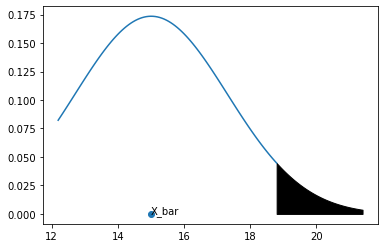

In [30]:
x_min = min(l)
x_max = max(l)
mean = sample_mean
std = sample_std

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

t_critical_right = mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color="black")

plt.scatter(mean, 0)
plt.annotate("X_bar", (mean, 0.0007))